<h1>Project 1: Linear and SVM Regression</h1>
<h2>Module: Machine learning (IMC-4302C)
ESIEE</h2>


<h3>Submitted by :</h3> PHAM Quoc Trung & Sahar Hossein

<h2> 1. Basic notions about machine learning </h2>

<h3> 1. What is the difference between supervised and unsupervised learning? </h3>

<h4>Answer:</h4>

- First, the difference is that Supervised learning uses known and labeled Data X, Y as input, while Unsupervised learning only have input data (X) and no corresponding output variables.

- Second, The aim of SUpervised learning is is to approximate the mapping function( Y = aX) then the corresponding output variable can be predicted, while unsupervised is to model the distribution in the data in order to learn more about the data.

- Thus, Supervised learning has the good accurate, while Unsupervised has the moderate one.




<h3> 2. Describe two real-life situations in which cluster analysis might be used. Specify the features, design the predictor. </h3>

<h4>Answer:</h4>

- The first situation:
    A sushishop want to open few shops in Paris, but they have to find the place to put the stores, where they can distribute asap. They have to consider some places
    where most clients live, then calculate the distance of estimated place to those place.
- The second situation:
    Online movie website, like Netflix, want to know the seerch of clients, and based on the search, they can predict the types of movies which clients usually searched or watched. Then the website and always give the best suggestion movie to their clients.

<h2> 2. Programming Section </h2>


In this project, you are invited to work with the 50 Startups dataset to predict the profit of
startups. First, use the linear regression to train a linear model. Then, use the SVM with
an adequate kernel and parameters to train a SVM regression model. Finally, test the two
models and choose which one is better for this dataset by comparing their performances.


For each of these questions,explain which method or steps are used and justify your
choice/strategy. Discuss and interpret all the results you get. You are encouraged to put
some notes and remarks directly in the notebook within a markdown cell.

<h3> 1. Load the dataset and explore it. Solve the problem of missing values if any. </h3>

Load libraries and load data. More libraries will be added later when needed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('50_Startups.csv')

Cannot use data = np.loadtxt('50_Startups.csv'), because could not convert string to float: 'R&D'.

In [3]:
print(data)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [4]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


As we can see in the file, there are few missing values which has been replaced into value 0.00, because the companies could not spend no money into Market and RnD.

In [5]:
data['R&D Spend'].isnull().sum()

0

In [6]:
data['Marketing Spend'].isnull().sum()

0

As we can see from the data table, 
In this case, since we do not have data for this, I will replace those 0.00 into the average of the whole.

In [7]:
RnD = data['R&D Spend'].replace(0.00,data['R&D Spend'].mean())

In [8]:
Mkt = data['Marketing Spend'].replace(0.00,data['Marketing Spend'].mean())

The missing data has been fullfilled by the mean value.

Here we would like to see the State data. 

In [9]:
data['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

As we can see, there are 3 states only in the data.
Because the data of State is the string, and we do not want to drop it, thus we will have to transfer it into integeter value later.

<h3> 2. Train a linear regression model. Then, evaluate its performance using the adequate metrics. </h3>

In the model, we would like to choose 2 model to see the relevance. The first is the pair between  $RnD Spend$ and $Profit$, and the second one is $Marketing Spend$ and $Profit$. 

Text(0.5, 1.0, 'RnD and Profit')

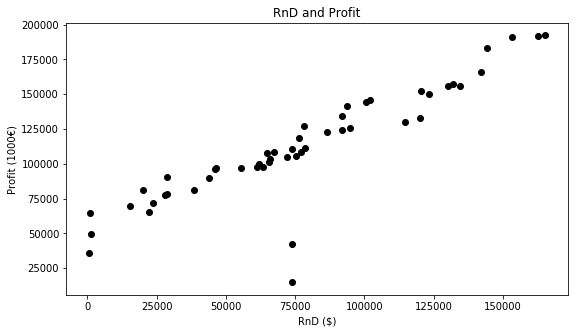

In [11]:
P = data['Profit']
plt.figure("Visualize house data",figsize=(9,5))
plt.scatter(RnD,P,  color='black')
plt.xlabel('RnD ($)')
plt.ylabel('Profit (1000€)')
plt.title('RnD and Profit')

Text(0.5, 1.0, 'Market and Profit')

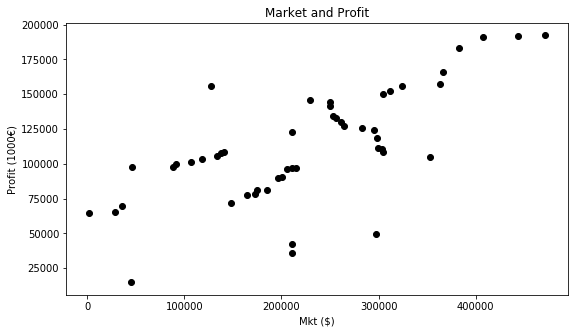

In [12]:
plt.figure("Visualize house data",figsize=(9,5))
plt.scatter(Mkt,P,  color='black')
plt.xlabel('Mkt ($)')
plt.ylabel('Profit (1000€)')
plt.title('Market and Profit')

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
RnD = RnD.values.reshape(-1, 1)  # values converts it into a numpy array
Mkt = Mkt.values.reshape(-1, 1)
P = P.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

In [15]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(RnD, P)  # perform linear regression
RnD_pred = linear_regressor.predict(RnD)

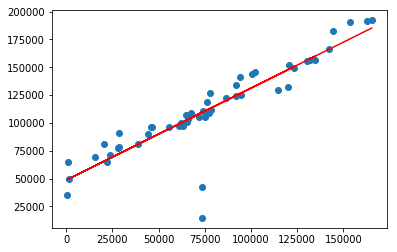

In [16]:
plt.scatter(RnD, P)
plt.plot(RnD,RnD_pred, color='red')
plt.show()

In [17]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(Mkt, P)  # perform linear regression
Mkt_pred = linear_regressor.predict(Mkt)

plt.scatter(Mkt, P)
plt.plot(Mkt,Mkt_pred, color='red')
plt.show()

As we can see, the profit increase when companies spend more and more money in RnD and Marketing.

<h3> 3. Introduce the regularization on your model if it wasn’t used and tune its regularization parameter. </h3>

In [24]:
X = data.iloc[:, :-1].values

In [25]:
y = data.iloc[:, 4].values

Since the $State$ data is not the integer, thus we need to change it into number, then we can make a train model. We dont prefer to drop it.

In [31]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
St = LabelEncoder()
X[:, 3] = St.fit_transform(X[:,3])
print(X[:,3])

[2 0 1 2 1 2 0 1 2 0 1 0 1 0 1 2 0 2 1 2 0 2 1 1 2 0 1 2 1 2 1 2 0 1 0 2 1
 0 2 0 0 1 0 2 0 2 1 0 2 0]


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
y_pred = regressor.predict(X_test)
print(y_pred)
print(y_test)

[103959.40508021 132398.73236694 133529.03790148  72958.28368314
 179534.78737166 115533.62584099  67476.95847883  98504.36199396
 114789.16083781 168972.21909945]
[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]


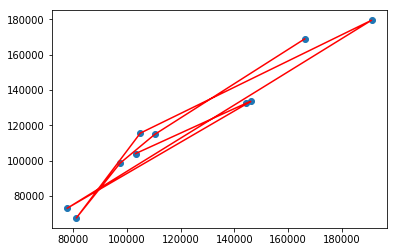

In [30]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_pred, color='red')
plt.show()

- Something run wrong in the model!

<h3>4. Study the correlation between the different features. Reduce their number by removing
the feature(s) that bring the least information to the remaining features. Then, train
a linear regression model with the remaining features and evaluate it. What do you
notice?</h3>

The features brings least information could be the $State$, and $Adminstration $ thus we are going ignore it.
We will train the linear regression between 3 features: $RnD Spend$,$Marketing Spend$,and $Profit$.

Coefficients:  [[0.70624403 0.06998388]]
Intercept:  [42210.11297211]
Mean squared error: 307047836.70
Final error =  153523918.347626
R² score: 0.81


Text(0.5, 0, 'Profit')

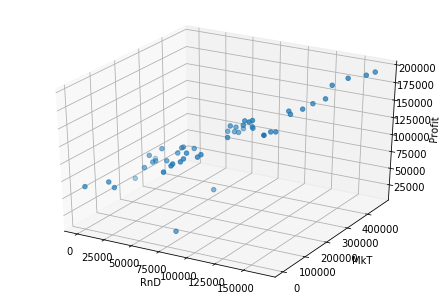

In [32]:
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d.axes3d import*
from matplotlib import cm
%matplotlib notebook
%matplotlib inline

m = data.shape[0]         # number of sample

X = np.concatenate((RnD,Mkt),axis=1)        # number of features


regressor = linear_model.LinearRegression()
# your code here

regressor.fit(X,P)
# coefficients and intercept
print('Coefficients: ', regressor.coef_)
print('Intercept: ', regressor.intercept_)

# use the trained model to predict
prediction = regressor.predict(X)

# mean squared error and R^2 score
print("Mean squared error: %.2f"% mean_squared_error(P, prediction))
print("Final error = ",np.sum((prediction-P)**2)/(2*m))
print('R² score: %.2f' % regressor.score(X, P))


fig=plt.figure('Surface plot')
ax=Axes3D(fig)
ax.scatter(RnD,Mkt,P)

x1 = np.linspace(0,400,400) 
x2 = np.arange(13)
x1, x2 = np.meshgrid(x1, x2)

X3=np.concatenate((x1[:,:,np.newaxis],x2[:,:,np.newaxis]),axis=-1)
X3bis=X3.reshape((X3.shape[0]*X3.shape[1],X3.shape[2]))
Zbis = regressor.predict(X3bis)
Z=Zbis.reshape((X3.shape[0],X3.shape[1]))

ax.plot_surface(x1,x2,Z,rstride=1,cstride=1,cmap=cm.jet,linewidth=1,antialiased=True)
ax.set_xlabel('RnD')
ax.set_ylabel('MkT')
ax.set_zlabel('Profit')

- The value of R-square is up to 0.81, which could show that the linear regression is still reasonable.

<h3> 5. Add some polynomial features to the remaining features and evaluate the new model. Is it interesting to add polynomial features? </h3>

The best feature to use polynomial is $Marketing spend$ and $Profit$.

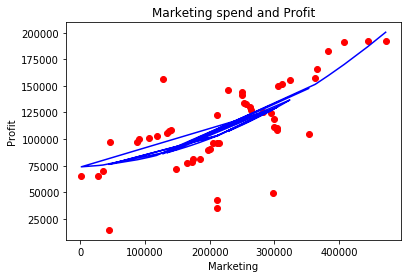

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
Mkt_poly = poly_reg.fit_transform(Mkt)
regressor.fit(Mkt_poly, P)
P_poly_pred = regressor.predict(Mkt_poly)
# Visualizing the Polymonial Regression results
plt.scatter(Mkt, P, color='red')
plt.plot(Mkt, P_poly_pred, color='b')
plt.title('Marketing spend and Profit')
plt.xlabel('Marketing')
plt.ylabel('Profit')
plt.show()

We have a problem in the chart, that seem the Poly has been calculated few times together. Thus in the chart, it shows few lines on it.

<h3> 6. Train an SVM regression model. Use different kernels (linear, gaussian,...) and values of parameters. Then, validate the best choice. </h3>

As we can see, the graph of pairs $RnD Spend$ - $Profit$, is more linear, while the graph of $Marketing Spend$ - $Profit$ is non-linear.
Thus it is better if we apply $Linear$ kernel to pairs $RnD Spend$ - $Profit$, and $Gaussuain$ kernel to $Marketing Spend$ - $Profit$. 

In [35]:
from sklearn import svm

In [36]:
from sklearn import svm
# Since our problem is non-linear, we use gaussian kernel(rbf kernel)
regressor = svm.SVR(kernel = 'rbf')
regressor.fit(Mkt, P)

D:\Study\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Study\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

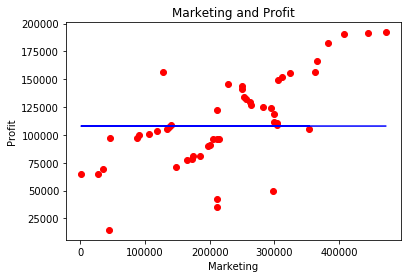

In [37]:
plt.scatter(Mkt, y, color = 'red')
plt.plot(Mkt, regressor.predict(Mkt), color = 'blue')
plt.title('Marketing and Profit')
plt.xlabel('Marketing')
plt.ylabel('Profit')
plt.show()

In [38]:
regressor1 = svm.SVR(kernel = 'linear')
regressor1.fit(RnD, P)

D:\Study\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

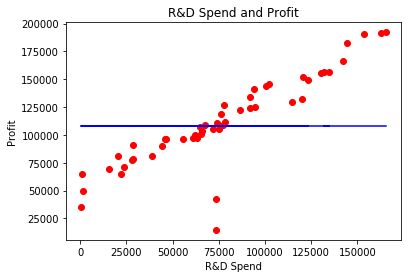

In [39]:
plt.scatter(RnD, y, color = 'red')
plt.plot(RnD, regressor.predict(RnD), color = 'blue')
plt.title('R&D Spend and Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

<h3> 7. Choose the final model you will use for this dataset and justify your choice. Estimate the generalized performance of this model. </h3>

We are not able to run the model well. it seems the graph not correct. However, based on what we discuss, we agree that $linear regression$ is best for $RnD Spend$ - $profit$, and $Polynominal model$ is suitable for $Marketing$-$profit$.